In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [2]:
#read in dataset
ais = pd.read_excel('datasets/ais/ais.xlsx')

In [3]:
ais.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [5]:
ais_grouped = ais.groupby('sex')

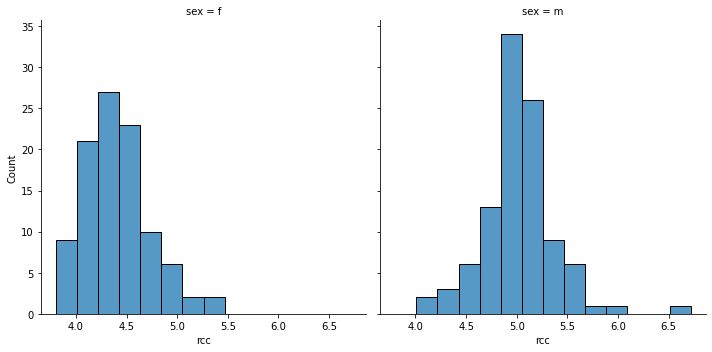

In [18]:
#visualize the distribution of red blood cell counts by sex
sns.displot(x= 'rcc', data=ais, col = 'sex')

In [19]:
#testing for difference in mean between two groups
stats.ttest_ind(ais[ais['sex']=='f']['rcc'],ais[ais['sex']=='m']['rcc'])

Ttest_indResult(statistic=-13.144647003438955, pvalue=7.463492766248318e-29)

In [22]:
#correlation matrix of all relevant variables
ais[['rcc','wcc','hc','hg','ferr','bmi','ssf','pcBfat','lbm','ht','wt']].corr()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
rcc,1.000000,0.147064,0.924964,0.888800,0.250865,0.299471,-0.403004,-0.493512,0.550975,0.358854,0.403763
wcc,0.147064,1.000000,0.153333,0.134720,0.132073,0.176968,0.136999,0.107960,0.102663,0.076811,0.155662
hc,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,-0.532449,0.583375,0.371192,0.423711
hg,0.888800,0.134720,0.950757,1.000000,0.308391,0.382524,-0.435429,-0.531522,0.610986,0.352322,0.455263
ferr,0.250865,0.132073,0.258240,0.308391,1.000000,0.302556,-0.108243,-0.183386,0.317581,0.123255,0.273702
bmi,0.299471,0.176968,0.320527,0.382524,0.302556,1.000000,0.321116,0.187558,0.713858,0.337097,0.845934
ssf,-0.403004,0.136999,-0.449135,-0.435429,-0.108243,0.321116,1.000000,0.963017,-0.207749,-0.071253,0.154196
pcBfat,-0.493512,0.107960,-0.532449,-0.531522,-0.183386,0.187558,0.963017,1.000000,-0.361850,-0.188022,-0.000193
lbm,0.550975,0.102663,0.583375,0.610986,0.317581,0.713858,-0.207749,-0.361850,1.000000,0.802119,0.930913
ht,0.358854,0.076811,0.371192,0.352322,0.123255,0.337097,-0.071253,-0.188022,0.802119,1.000000,0.780932


Text(0.5, 1.0, 'Relationship between height and weight')

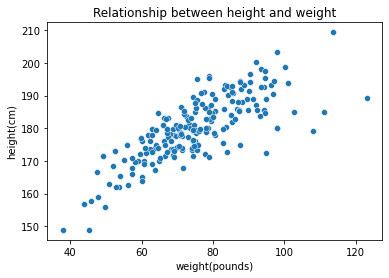

In [24]:
#relationship between height and weight
sns.scatterplot(x='wt', y='ht', data = ais)
plt.xlabel('weight(pounds)')
plt.ylabel('height(cm)')
plt.title('Relationship between height and weight')

In [27]:
#regress height on weight
stats.linregress(x=ais['wt'],y=ais['ht'])

LinregressResult(slope=0.5459152615828846, intercept=139.1559916960434, rvalue=0.7809320717301679, pvalue=9.539370892367334e-43, stderr=0.03087521971123357, intercept_stderr=2.3552631513894258)

Text(0.5, 1.0, 'Relationship between weight and height')

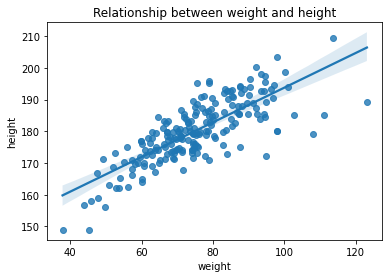

In [29]:
sns.regplot(x='wt',y='ht',data=ais)
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Relationship between weight and height')

In [30]:
#create linear regression object
regr = linear_model.LinearRegression()

In [31]:
#model selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(ais[['wt']],ais[['ht']],random_state=1234)

In [32]:
#train the model
regr.fit(x_train,y_train)

LinearRegression()

In [33]:
#make predictions on test set
y_pred = regr.predict(x_test)

In [35]:
y_pred[:5]

array([[179.25197112],
       [185.52039552],
       [179.52216182],
       [179.3600474 ],
       [177.03640732]])

In [36]:
#return the coefficient of our test model
regr.coef_

array([[0.54038141]])

In [37]:
#get the rsquared
metrics.r2_score(y_test,y_pred)

0.6195947657121406

In [38]:
#get the RMSE
metrics.mean_squared_error(y_test,y_pred)

36.49986906710923